Изучить и сравнить влияние различных типов регуляризации (L1, L2, и отсутствие регуляризации) на производительность модели логистической регрессии, используя датасет о винах.



Задачи:

Подготовка данных:

Загрузите датасет о винах.
Разделите данные на обучающую и тестовую выборки.
Произведите стандартизацию признаков.


Обучение и оценка моделей:

Обучите три различные модели логистической регрессии:

Модель без регуляризации (penalty=None).
Модель с L1 регуляризацией (Lasso).
Модель с L2 регуляризацией (Ridge).
Для каждой модели оцените производительность на тестовой выборке, используя отчет о классификации и матрицу ошибок.



Сравнение моделей:

Сравните производительность всех трех моделей, обращая внимание на метрики качества, такие как точность и F1-мера.
Обсудите, как регуляризация влияет на переобучение и общее качество модели.


Визуализация важности признаков:

Для модели с L1 регуляризацией визуализируйте коэффициенты признаков, чтобы понять их важность.
Создайте словарь, где ключами будут названия признаков, а значениями — соответствующие коэффициенты. Убедитесь, что учитываются только те признаки, коэффициенты для которых не равны нулю, тем самым подчеркивая эффект отбора признаков, который оказывает L1 регуляризация.
Создайте визуализацию, показывающую, какие признаки оказали наибольшее влияние на принятие решений моделью.


Требования к выполнению:

Используйте train_test_split для разделения данных на обучающую и тестовую выборки.
Примените StandardScaler для стандартизации признаков перед обучением моделей.
Для обучения моделей с L1 и L2 регуляризациями выберите подходящие значения параметра C и укажите соответствующие значения penalty и solver.
Используйте classification_report и confusion_matrix для оценки каждой модели.
При визуализации коэффициентов обратите внимание на коэффициенты, отличные от нуля, и отобразите их значимость на графике.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

data = load_wine()

features = data['data']
cols = data['feature_names']
target = data['target']
target_name = data['target_names']

dataset = pd.DataFrame(data=features, columns= cols)
dataset['target'] = target
target_dict = {i: target_name[i] for i in range(len(target_name))}
dataset['target_name'] = dataset['target'].map(target_dict)

X = dataset.drop(columns = ['target', 'target_name'])
y = dataset[['target', 'target_name']].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

scaler = StandardScaler()
scaler.fit(X_train)
X_tr_scaled = scaler.transform(X_train)
X_t_scaled = scaler.transform(X_test)

X_tr_scaled = pd.DataFrame(data=X_tr_scaled, columns=X_train.columns)
X_t_scaled = pd.DataFrame(data=X_t_scaled, columns=X_test.columns)

model = LogReg()
model.fit(X_tr_scaled, y_train['target'])
prediction = model.predict(X_t_scaled)

print(f"Модель без регуляризации (penalty=None):\n{classification_report(y_test['target'], prediction)}")
print(confusion_matrix(y_test['target'], prediction))

Модель без регуляризации (penalty=None):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.94      0.97        17
           2       0.95      1.00      0.97        18

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54

[[19  0  0]
 [ 0 16  1]
 [ 0  0 18]]


In [2]:
X_tr_scaled

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,-1.589365,-0.589661,0.832976,1.785241,-0.796856,-0.672492,-0.472092,0.291202,-0.567763,-1.013582,1.661484,0.878442,-0.586676
1,-0.656938,0.193778,-0.341525,0.642244,-0.656898,-1.060724,-0.240313,2.332150,-0.424486,-0.971003,-0.479070,1.009837,-1.342554
2,-1.419833,-0.180136,1.369891,2.499614,-0.516941,-0.332789,0.162782,1.704166,0.184440,-0.843267,-0.008148,-0.245719,-0.880459
3,-0.814361,-0.643078,-0.542869,0.185046,0.252827,-1.998952,-1.066657,0.055708,-0.352848,-0.821977,-0.282139,-1.150887,0.355876
4,1.716515,-0.411607,0.027603,-2.215247,0.182848,1.559842,1.573614,-0.572276,2.333590,1.072780,0.976507,0.571853,2.427654
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,-1.831554,0.060237,0.161832,0.070746,-0.237025,0.912789,0.717038,-0.336782,0.309807,-0.736820,-0.735936,1.141233,-0.393882
120,-1.456161,0.309513,1.839691,0.070746,0.252827,-0.947490,-0.048843,1.861162,-1.087141,-0.502636,1.104940,-0.158122,-0.448966
121,1.377450,-0.278066,0.094718,-0.272153,0.252827,0.670144,0.848043,-0.336782,1.294834,0.519256,0.419963,0.206865,0.937320
122,0.336037,0.229389,1.671905,0.356495,1.302510,0.751026,0.616264,0.212704,0.291897,-0.281226,0.291530,0.469656,-0.057256


In [23]:
lasso_model = LogReg(penalty='l1', C=1, solver='liblinear')
lasso_model.fit(X_tr_scaled, y_train['target'])
lasso_prediction = lasso_model.predict(X_t_scaled)
print(f"Модель с L1 регуляризацией (Lasso):\n{classification_report(y_test['target'],lasso_prediction)}")
print(confusion_matrix(y_test['target'],lasso_prediction))

Модель с L1 регуляризацией (Lasso):
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       1.00      0.94      0.97        17
           2       1.00      1.00      1.00        18

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54

[[19  0  0]
 [ 1 16  0]
 [ 0  0 18]]


In [24]:
ridge_model = LogReg(penalty='l2', C=1, solver='liblinear')
ridge_model.fit(X_tr_scaled, y_train['target'])
ridge_prediction = ridge_model.predict(X_t_scaled)
print(f"Модель с L2 регуляризацией (Ridge):\n{classification_report(y_test['target'],ridge_prediction)}")
print(confusion_matrix(y_test['target'],ridge_prediction))

Модель с L2 регуляризацией (Ridge):
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       1.00      0.94      0.97        17
           2       1.00      1.00      1.00        18

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54

[[19  0  0]
 [ 1 16  0]
 [ 0  0 18]]


In [25]:
print(f"Точность модели без регуляризации:          {accuracy_score(y_test['target'],prediction)}")
print(f"Точность модели с L1 регуляризацией (Lasso):{accuracy_score(y_test['target'],lasso_prediction)}")
print(f"Точность модели с L2 регуляризацией (Ridge):{accuracy_score(y_test['target'],ridge_prediction)}") 

Точность модели без регуляризации:          0.9814814814814815
Точность модели с L1 регуляризацией (Lasso):0.9814814814814815
Точность модели с L2 регуляризацией (Ridge):0.9814814814814815


In [26]:
print(f"F1-мера модели без регуляризации:          {f1_score(y_test['target'],prediction, average='macro')}")
print(f"F1-мера модели с L1 регуляризацией (Lasso):{f1_score(y_test['target'],lasso_prediction, average='macro')}")
print(f"F1-мера модели с L2 регуляризацией (Ridge):{f1_score(y_test['target'],ridge_prediction, average='macro')}")

F1-мера модели без регуляризации:          0.9808899808899808
F1-мера модели с L1 регуляризацией (Lasso):0.9813519813519814
F1-мера модели с L2 регуляризацией (Ridge):0.9813519813519814


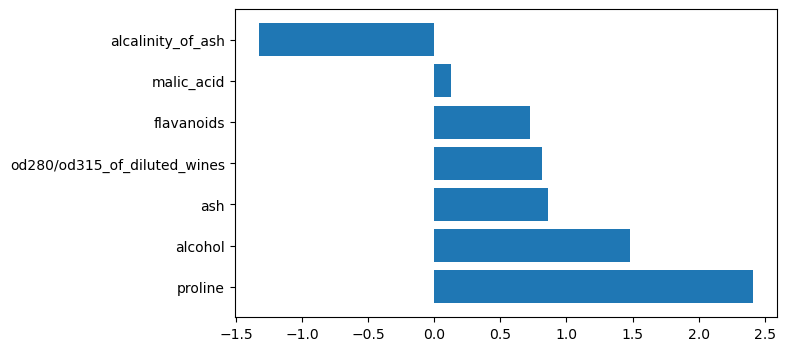

In [28]:
lasso_coef_dict = {lasso_model.feature_names_in_[i]: lasso_model.coef_[0][i] for i in range(len(lasso_model.feature_names_in_))
                  if lasso_model.coef_[0][i] != 0}

lasso_coef_dict = dict(sorted(lasso_coef_dict.items(), key=lambda x: x[1], reverse=True))

plt.figure(figsize=(7, 4))
plt.barh(range(len(lasso_coef_dict)), lasso_coef_dict.values())
plt.yticks(range(len(lasso_coef_dict)), lasso_coef_dict.keys())
plt.show()